# House Price Prediction

In [1]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("HousePricePrediction.csv")
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
df.shape

(2919, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [5]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [6]:
# Categorize the features depending on their their datatype
categorical = (df.dtypes == 'object')
categorical_variables = list(categorical[categorical].index)
print("Categorical columns: ",categorical_variables)

integer = (df.dtypes == 'int')
integer_variables = list(integer[integer].index)
print("Integer columns: ",integer_variables)

fl = (df.dtypes == 'float')
float_variables = list(fl[fl].index)
print("Float columns: ",float_variables)

Categorical columns:  ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Integer columns:  ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
Float columns:  ['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']


<AxesSubplot:>

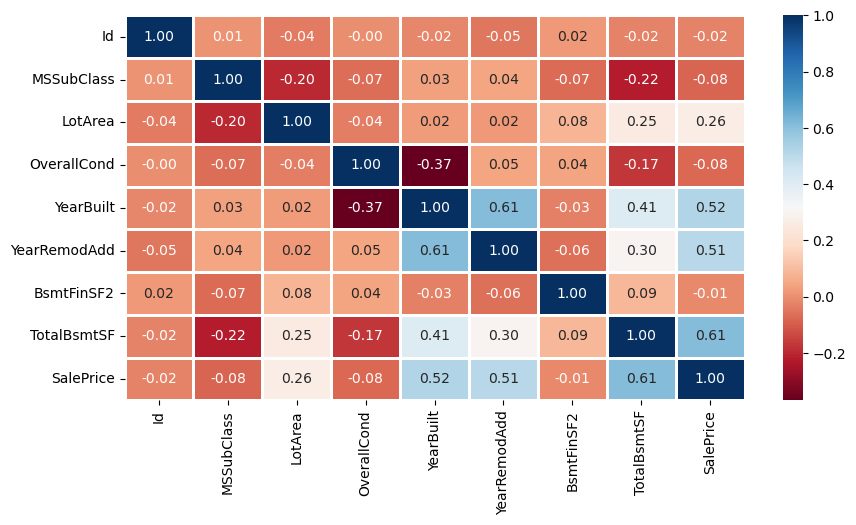

In [7]:
# Exploratory Data Analysis
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),
        cmap = 'RdBu',
        fmt = '.2f',
        linewidths = 2,
        annot = True)

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

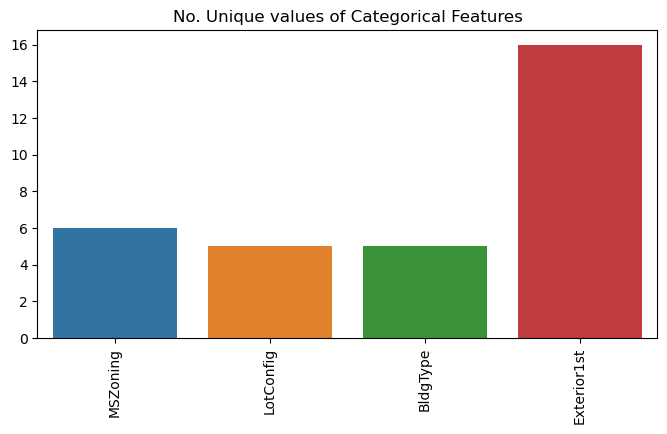

In [8]:
# Barplot for categorical features
unique_values = []
for col in categorical_variables:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(8,4))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=categorical_variables,y=unique_values)

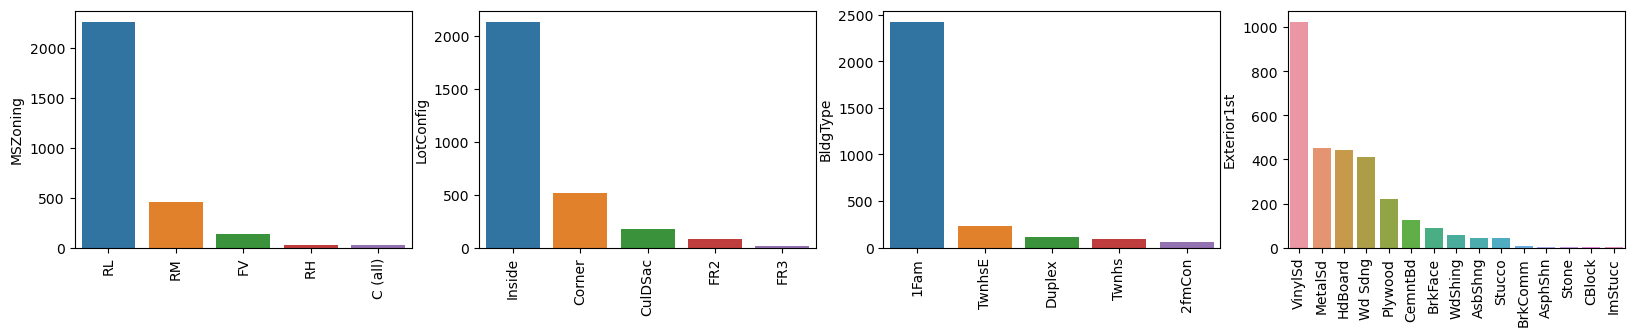

In [9]:
plt.figure(figsize=(20, 40))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in categorical_variables:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [10]:
# Data Cleaning
df.drop(['Id'], axis=1, inplace = True)

In [11]:
# Checking for null values
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [12]:
df["SalePrice"] = df["SalePrice"].fillna(df["SalePrice"].mean())

In [13]:
df = df.dropna()

In [14]:
df.shape

(2913, 12)

In [15]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [16]:
categorical = (df.dtypes == 'object')
categorical_variables = list(categorical[categorical].index)
print("Categorical columns: ",categorical_variables)

Categorical columns:  ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


In [17]:
# Label categorical features using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MSZoning'] = le.fit_transform(df['MSZoning'])
df['LotConfig'] = le.fit_transform(df['LotConfig'])
df['BldgType'] = le.fit_transform(df['BldgType'])
df['Exterior1st'] = le.fit_transform(df['Exterior1st'])

In [22]:
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0


In [18]:
# Seperating dependent and independent variables
x = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [19]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [21]:
# Model and Loss calculation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, accuracy_score

LR_model = LinearRegression()

LR_model.fit(x_train,y_train)
y_pred = LR_model.predict(x_test)
mean_absolute_percentage_error(y_test,y_pred)

0.18466666253038996